## Automatic Topic Labeling with Wordnet German editorial articles

In [1]:
import sys
sys.path.append("../..")
from src.Automati_Topic_Labeling_Wordnet.extrinsic_topic_labler import ExtrensicTopicLabeler
from src.Automati_Topic_Labeling_Wordnet.wordnet_embeddings import Wordnet
from src.Automati_Topic_Labeling_Wordnet.polyglot_embeddings import get_topic_labels as pl
from src.models import topic_models as tm
from src.Automati_Topic_Labeling_Wordnet.topic_embedding import words_for_topics as wt

C:\Users\Maria\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
tm = tm.TopicModel.load("topic_models/lda/DEED_lda_german_editorial_articles_190.pkl")
topics = tm.get_topics()
topics_df = tm.get_topics_dataframe()

In [3]:
new_topics = wt(topics,3)

### Choose lables with Scoringfunction over Hypernyms

In [20]:
e = ExtrensicTopicLabeler()
labels = e.get_topic_labels(topics, values=False)
labels_preprocessed = e.get_topic_labels(new_topics, values=False)

In [23]:
### take only the best label
llist = []
for ll in labels: 
    try:
        llist.append(ll[0])
    except IndexError:
        llist.append([])
llpre = [] 
for ll in labels_preprocessed: 
    try:
        llpre.append(ll[0])
    except IndexError:
        llpre.append([])

In [24]:
combined_df = e.combine_topic_and_labels(topics_df, llist)
combined_df['preprocessed_labels'] = llpre
display(combined_df)

,0,1,2,3,4,5,6,7,8,9,labels,preprocessed_labels
Topic 0,tier,zeigen,video,filmen,zustand,huber,bild,aufnehmen,tot,huhn,visual_communication,small_indefinite_quantity
Topic 1,bio,bio-siegel,ökologisch,produkt,siegeln,biologisch,stammen,bio-produkte,streng,demeter,[],[]
Topic 2,gemüse,obst,ware,verkaufen,handeln,produkt,kunde,aussehen,möhre,perfekt,spend,[]
Topic 3,weber,rudolf_steiner,eisen,paul,demeter,hallen,schwierigkeit,einziehen,beweisen,anthroposophischen,flux_unit,flux_unit
Topic 4,honig,soja,brasilien,biene,imkern,deutschland,wwf,weltweit,südamerika,problem,legume,legume
Topic 5,standard,lampert,bio,lebensmittel,konsument,preisen,österreich,qualität,produkt,sehen,system_of_measurement,[]
Topic 6,welt,online,schließlich,all,stehen,rest,ökologisch,finden,nehmen,bisschen,seam,seam
Topic 7,biobauern,berg,europa,erklären,kilometer,konsument,supermarktregalen,gemüseanbau,produkt,genügen,metric_linear_unit,floater
Topic 8,kuh,weide,prozent,stall,landwirtschaft,bauer,horn,milchkühe,kalb,deutsch,alarm,[]
Topic 9,vorwurf,weisen,unternehmen,kritik,falsch,fall,peta,laut,vereinen,anzeige,slip,[]


### Lowest common Hypernym with Similarityfunction

In [25]:
wb = Wordnet()
labelswb = wb.get_topic_labels(topics,"path_similarity")

labels_p_wb = wb.get_topic_labels(new_topics,"path_similarity")

combined_dfwb = e.combine_topic_and_labels(topics_df, labelswb)
combined_dfwb['preprocessed_labels'] = labels_p_wb
display(combined_dfwb)



,0,1,2,3,4,5,6,7,8,9,labels,preprocessed_labels
Topic 0,tier,zeigen,video,filmen,zustand,huber,bild,aufnehmen,tot,huhn,[person],[person]
Topic 1,bio,bio-siegel,ökologisch,produkt,siegeln,biologisch,stammen,bio-produkte,streng,demeter,[],[]
Topic 2,gemüse,obst,ware,verkaufen,handeln,produkt,kunde,aussehen,möhre,perfekt,[],[]
Topic 3,weber,rudolf_steiner,eisen,paul,demeter,hallen,schwierigkeit,einziehen,beweisen,anthroposophischen,[person],[deity]
Topic 4,honig,soja,brasilien,biene,imkern,deutschland,wwf,weltweit,südamerika,problem,[entity],[]
Topic 5,standard,lampert,bio,lebensmittel,konsument,preisen,österreich,qualität,produkt,sehen,[],[]
Topic 6,welt,online,schließlich,all,stehen,rest,ökologisch,finden,nehmen,bisschen,[state],[state]
Topic 7,biobauern,berg,europa,erklären,kilometer,konsument,supermarktregalen,gemüseanbau,produkt,genügen,[entity],[object]
Topic 8,kuh,weide,prozent,stall,landwirtschaft,bauer,horn,milchkühe,kalb,deutsch,[artifact],[]
Topic 9,vorwurf,weisen,unternehmen,kritik,falsch,fall,peta,laut,vereinen,anzeige,[],[]


In [26]:
wb = Wordnet()
labelswb = wb.get_topic_labels(topics,"lch_similarity")

labels_p_wb = wb.get_topic_labels(new_topics,"lch_similarity")

combined_dfwb = e.combine_topic_and_labels(topics_df, labelswb)
combined_dfwb['preprocessed_labels'] = labels_p_wb
display(combined_dfwb)

,0,1,2,3,4,5,6,7,8,9,labels,preprocessed_labels
Topic 0,tier,zeigen,video,filmen,zustand,huber,bild,aufnehmen,tot,huhn,[person],[person]
Topic 1,bio,bio-siegel,ökologisch,produkt,siegeln,biologisch,stammen,bio-produkte,streng,demeter,[],[]
Topic 2,gemüse,obst,ware,verkaufen,handeln,produkt,kunde,aussehen,möhre,perfekt,[],[]
Topic 3,weber,rudolf_steiner,eisen,paul,demeter,hallen,schwierigkeit,einziehen,beweisen,anthroposophischen,[person],[deity]
Topic 4,honig,soja,brasilien,biene,imkern,deutschland,wwf,weltweit,südamerika,problem,[entity],[]
Topic 5,standard,lampert,bio,lebensmittel,konsument,preisen,österreich,qualität,produkt,sehen,[],[]
Topic 6,welt,online,schließlich,all,stehen,rest,ökologisch,finden,nehmen,bisschen,[state],[state]
Topic 7,biobauern,berg,europa,erklären,kilometer,konsument,supermarktregalen,gemüseanbau,produkt,genügen,[entity],[object]
Topic 8,kuh,weide,prozent,stall,landwirtschaft,bauer,horn,milchkühe,kalb,deutsch,[artifact],[]
Topic 9,vorwurf,weisen,unternehmen,kritik,falsch,fall,peta,laut,vereinen,anzeige,[],[]


### Lowest common Hypernym with Wordembeddings

In [ ]:
labelspl = pl(topics)

labels_p_pl = (pl(new_topics))

combined_dfpl = e.combine_topic_and_labels(topics_df, labelspl)
combined_dfpl['preprocessed_labels'] = labels_p_pl
display(combined_dfpl)


In [36]:
from collections import Counter

In [46]:
def wordcount(df, name):
    label = list(df[name])
    label_list = [l[0] for l in label] 
    return Counter(label_list)

In [57]:
import numpy as np
import matplotlib.pyplot as plt
def plot_label_counts(df, name):
    counter = wordcount(df, name)
    labels, values = zip(*counter.items())
    indexes = np.arange(len(labels))
    plt.bar(indexes, values)
    plt.xticks(indexes, labels,rotation=45)
    plt.savefig("C:\\Users\\Maria\\Desktop\\count.pdf")    
    plt.show()

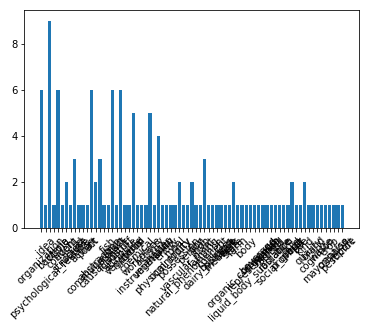

None


In [58]:
print(plot_label_counts(combined_dfpl, "labels"))